In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from shapely import Point
from statannotations.Annotator import Annotator
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':200})
sns.set_palette(sns.color_palette("colorblind"))

In [440]:
sns.color_palette("colorblind").as_hex()[1]

'#de8f05'

# "Training Curves" Attack

In [34]:
freemove_tfidf_refinement = pd.read_csv('results_recursive_search_freemove.csv')[['ARI', 'AMI']].rename(columns={'ARI':'ari', 'AMI':'ami'})
freemove_tfidf_refinement['data'] = 'freemove'
freemove_tfidf_refinement['step'] = 'tf_idf'

geolife_tfidf_refinement = pd.read_csv('results_recursive_search_geolife.csv')[['ARI', 'AMI']].rename(columns={'ARI':'ari', 'AMI':'ami'})
geolife_tfidf_refinement['data'] = 'geolife'
geolife_tfidf_refinement['step'] = 'tf_idf'

attack_metrics = pd.concat([pd.read_csv('attack_metrics.csv', sep=";"), freemove_tfidf_refinement.tail(1), geolife_tfidf_refinement.tail(1)])

Text(-0.3, 0.08, '0.07')

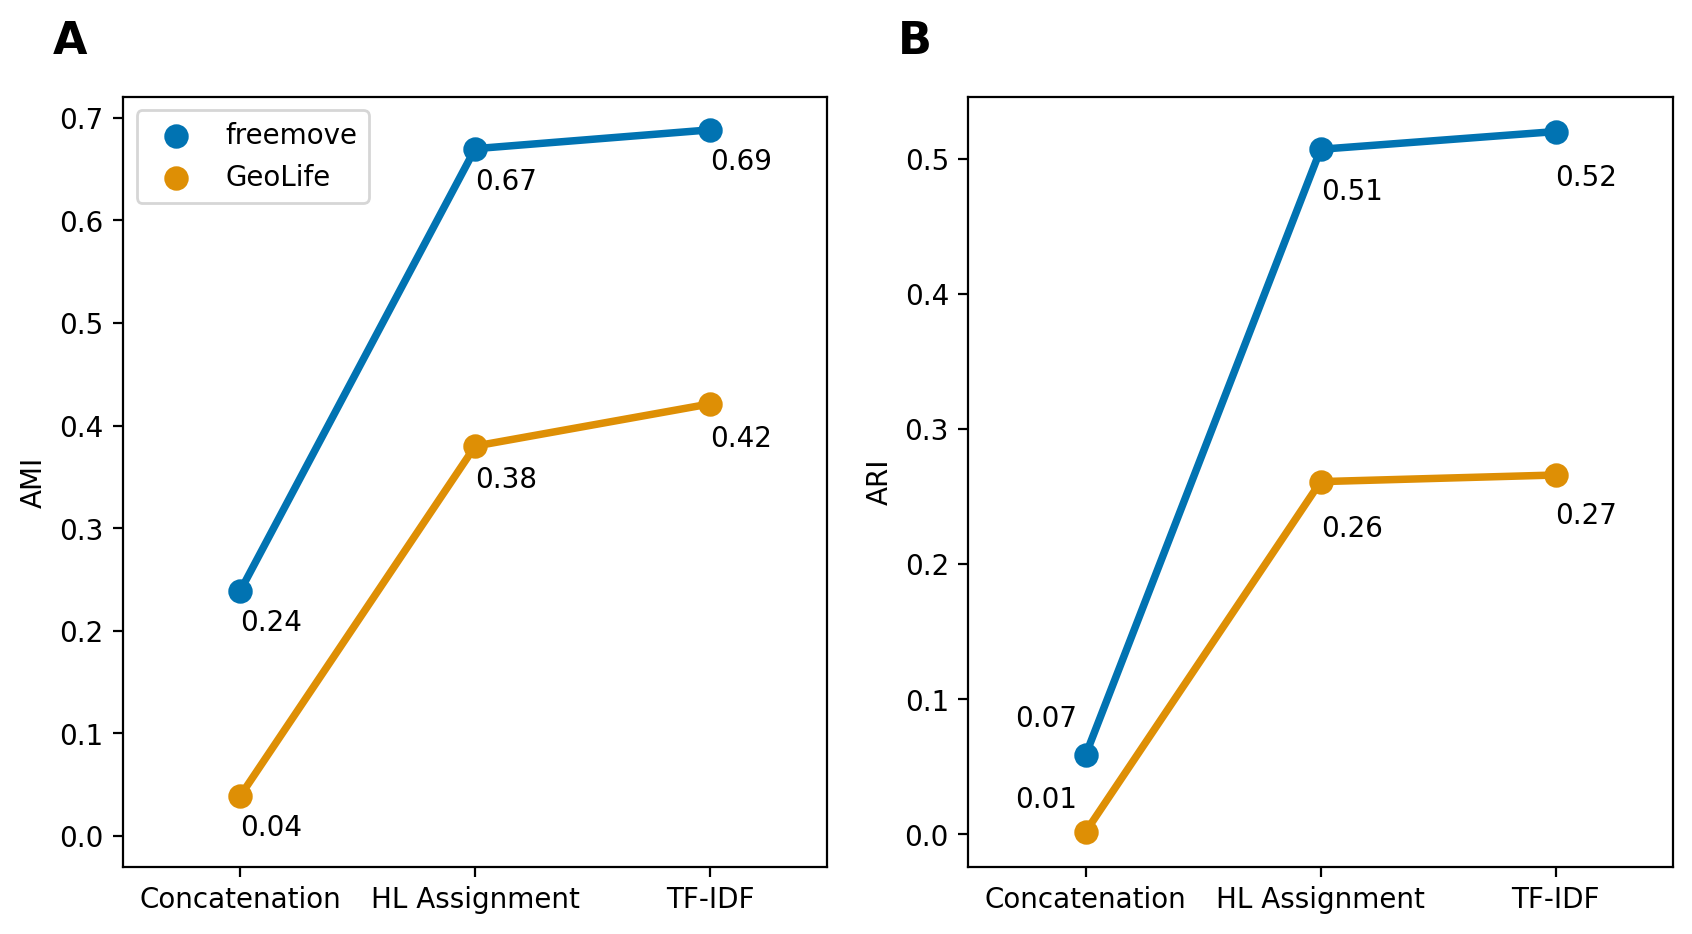

In [210]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1 = sns.pointplot(x="step", y="ami", data=attack_metrics, hue='data', ax=ax1)
ax2 = sns.pointplot(x="step", y="ari", data=attack_metrics, hue='data', ax=ax2)
        
ax2.legend([],[], frameon=False)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=['freemove', 'GeoLife'])


ax1.set_xlabel("")
ax2.set_xlabel("")
ax2.set_ylabel("ARI")
ax1.set_ylabel("AMI")

# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')
    
ax1.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])
ax2.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])

ax1.set_ylim(-0.03)
ax2.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])

[ax1.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax1.get_xticks(), np.round(attack_metrics.query("data=='freemove'").ami,2))]
[ax1.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax1.get_xticks(), np.round(attack_metrics.query("data=='geolife'").ami,2))]

[ax2.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax2.get_xticks()[1:], np.round(attack_metrics.query("data=='freemove'").ari,2)[1:])]
[ax2.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax2.get_xticks()[1:], np.round(attack_metrics.query("data=='geolife'").ari,2)[1:])]

ax2.text(x=-0.3, y=np.round(attack_metrics.query("data=='geolife'").ari + 0.02,2).iloc[0], s=np.round(attack_metrics.query("data=='geolife'").ari + 0.01,2).iloc[0])
ax2.text(x=-0.3, y=np.round(attack_metrics.query("data=='freemove'").ari + 0.02,2).iloc[0], s=np.round(attack_metrics.query("data=='freemove'").ari + 0.01,2).iloc[0])

# Reidentification evaluation on raw data

In [399]:
pd.concat([pd.read_csv('freemove_nrp_1.csv'),
           pd.read_csv('freemove_nrp_4.csv'),
           pd.read_csv('freemove_nrp_10.csv'),
           pd.read_csv('freemove_private_nrp_1.csv'),
           pd.read_csv('freemove_private_nrp_4.csv'),
           pd.read_csv('freemove_private_nrp_10.csv'),
           pd.read_csv('freemove_500tessellation_nrp_1.csv'),
           pd.read_csv('freemove_500tessellation_nrp_4.csv'),
           pd.read_csv('freemove_500tessellation_nrp_10.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_1.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_4.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_10.csv'),
           pd.read_csv('geolife_nrp_1.csv'),
           pd.read_csv('geolife_nrp_4.csv'),
           pd.read_csv('geolife_nrp_10.csv'),
          pd.read_csv('geolife_private_nrp_1.csv'),
           pd.read_csv('geolife_private_nrp_4.csv'),
           pd.read_csv('geolife_private_nrp_10.csv'),
           pd.read_csv('geolife_500tessellation_nrp_1.csv'),
           pd.read_csv('geolife_500tessellation_nrp_4.csv'),
           pd.read_csv('geolife_500tessellation_nrp_10.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_1.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_4.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_10.csv')], 
          keys=['freemove',
                'freemove',
                'freemove',
                'freemove_private',
                'freemove_private',
                'freemove_private',
                'freemove_500tessellation',
                'freemove_500tessellation',
                'freemove_500tessellation',
                'freemove_private_500tessellation',
                'freemove_private_500tessellation',
                'freemove_private_500tessellation',
                'geolife',
                'geolife',
                'geolife',
               'geolife_private',
                'geolife_private',
                'geolife_private',
                'geolife_500tessellation',
                'geolife_500tessellation',
                'geolife_500tessellation',
                'geolife_private_500tessellation',
                'geolife_private_500tessellation',
                'geolife_private_500tessellation']).reset_index(0, names="data").reset_index(drop=True).to_csv('reident_scores.csv', index=False)
           

In [401]:
scores = pd.read_csv('reident_scores.csv')

In [402]:
scores['user_id'] = scores.user_id.astype(str)

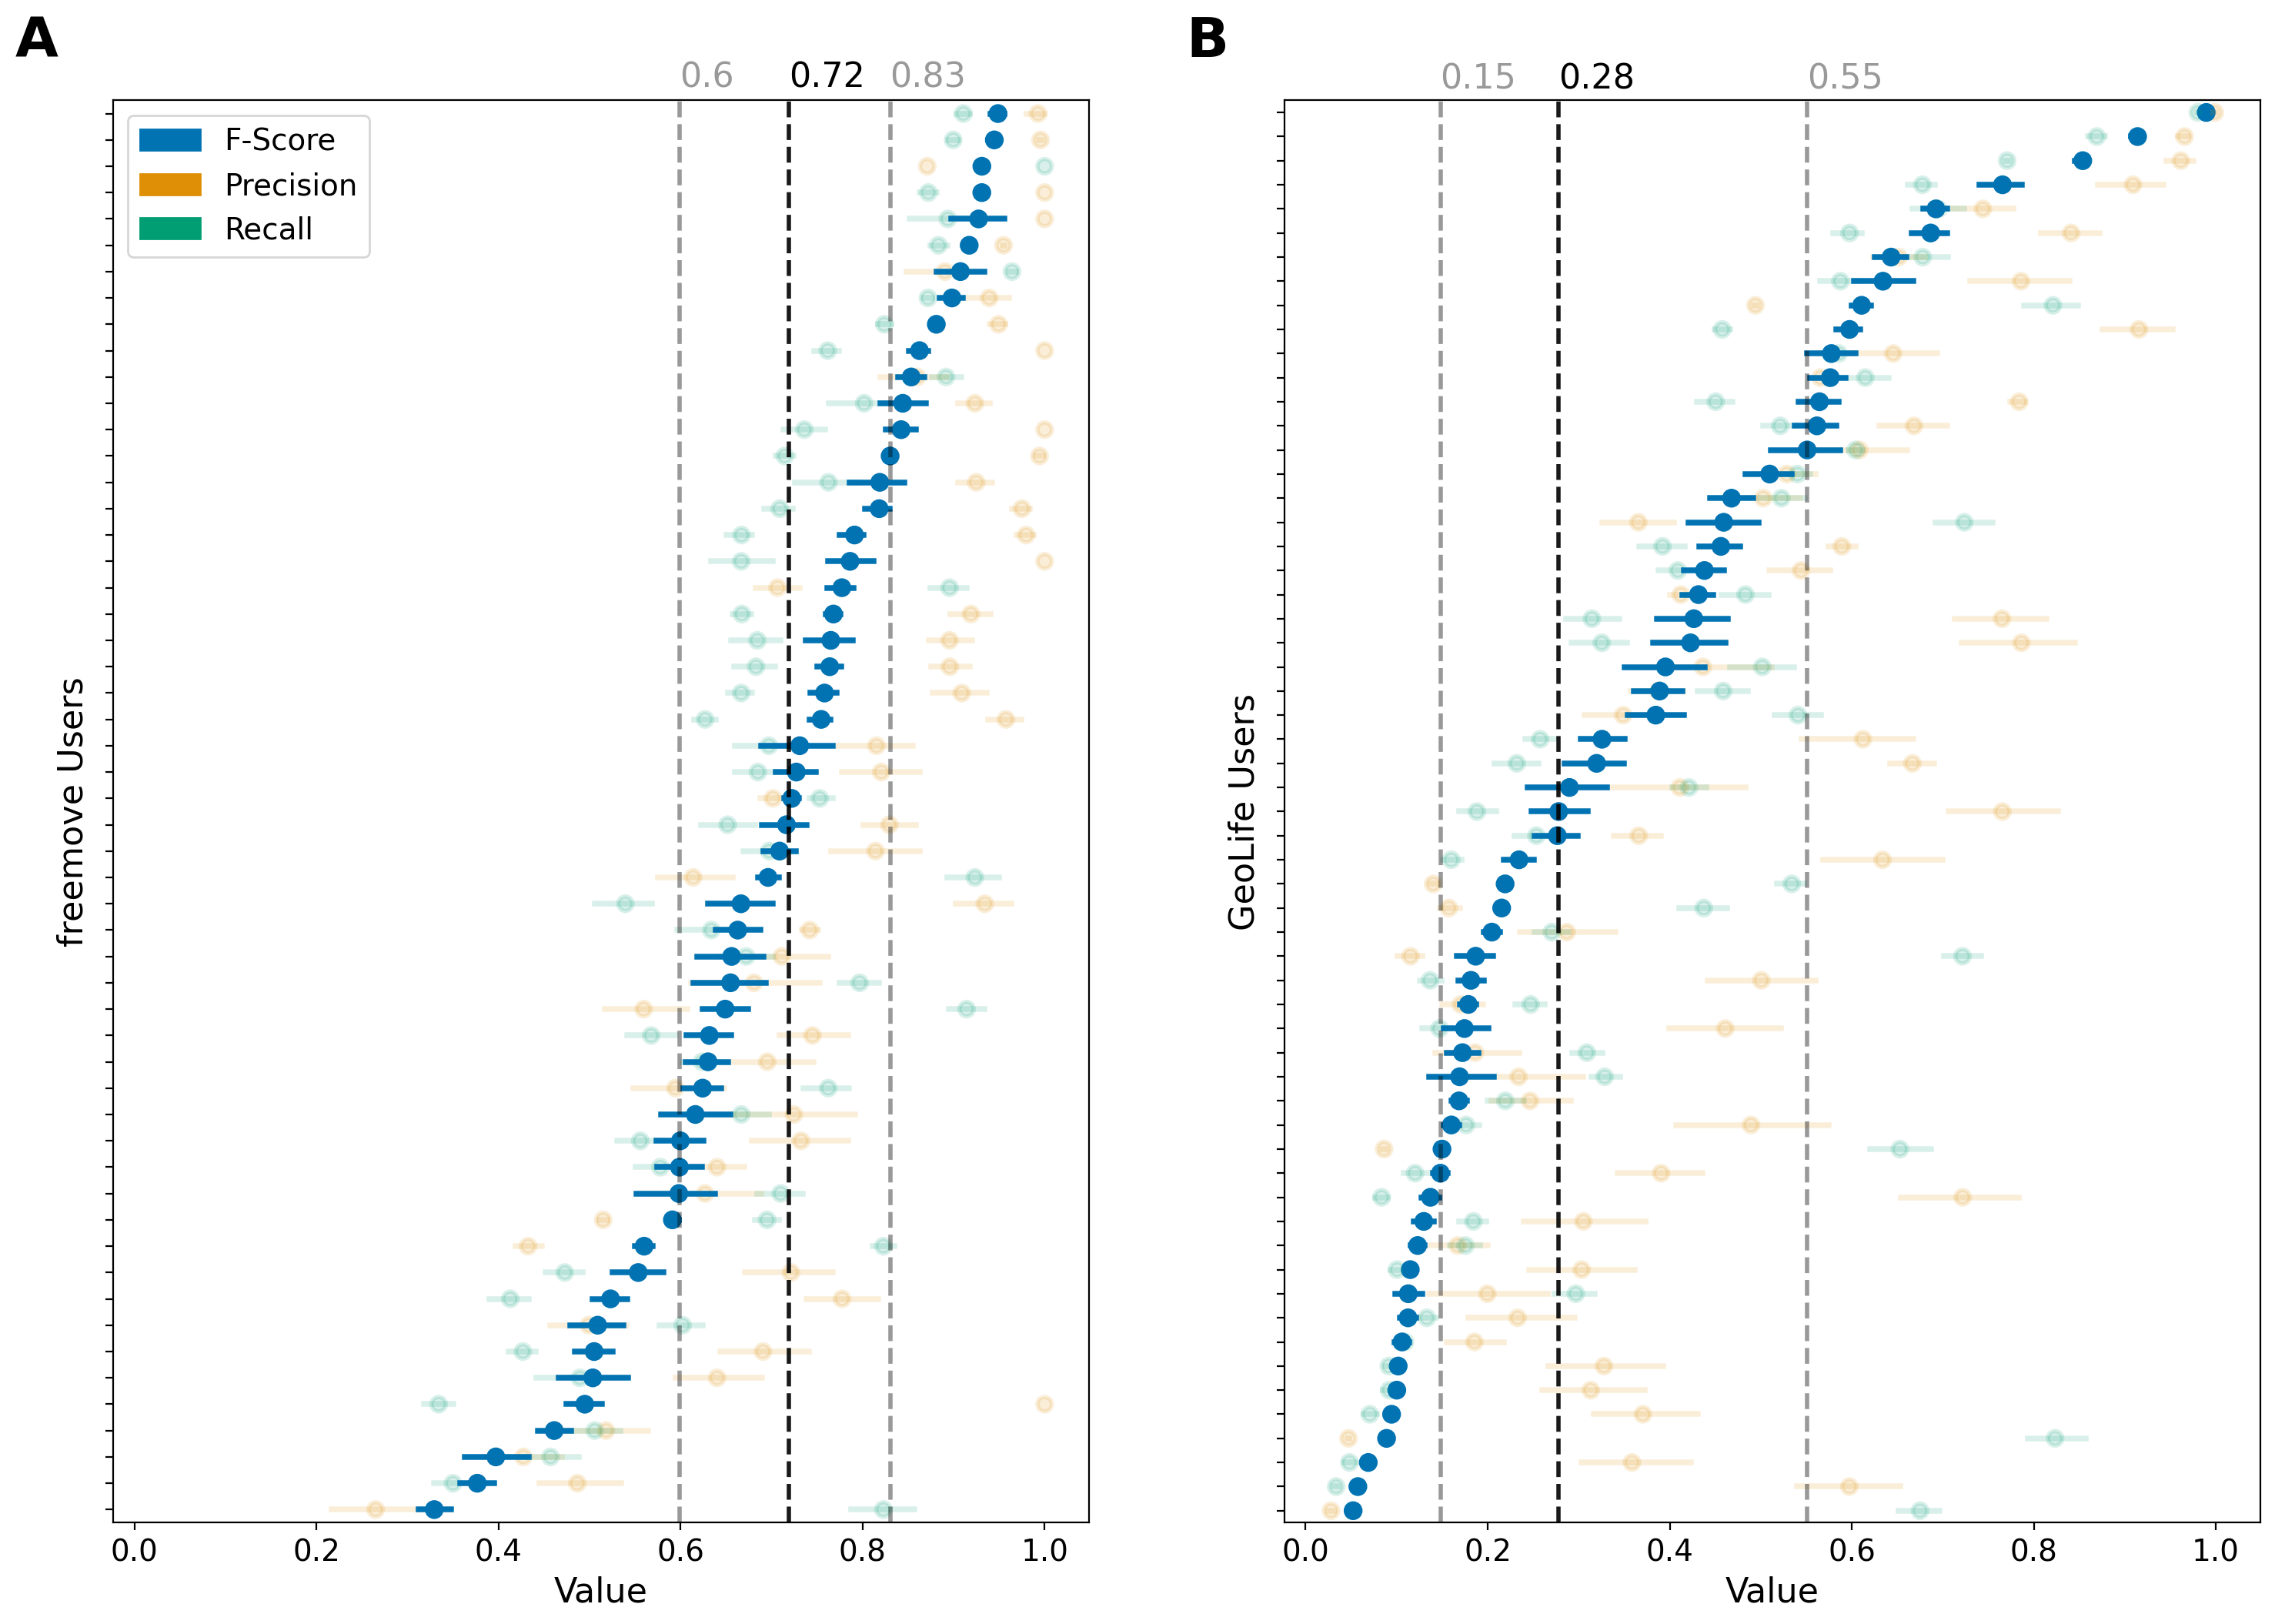

In [403]:
data_freemove = scores.query("data=='freemove' and nr_points==4").sort_values('fscore_user_mean', ascending=False)
data_geolife = scores.query("data=='geolife' and nr_points==4").sort_values('fscore_user_mean', ascending=False)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,12), sharey=False, sharex=True)

ax = sns.pointplot(x="precision", y="user_id", data=data_freemove, s=100, color=sns.color_palette("colorblind").as_hex()[1], label="Precision", join=False, ax=ax1)
ax = sns.pointplot(x="recall", y="user_id", data=data_freemove, s=100, color=sns.color_palette("colorblind").as_hex()[2], label="Recall", join=False, ax=ax1)
plt.setp(ax1.collections, alpha=.15) #for the markers
plt.setp(ax1.lines, alpha=.15)
ax = sns.pointplot(x="f_score", y="user_id", data=data_freemove, s=100, join=False, ax=ax1)

ax = sns.pointplot(x="precision", y="user_id", color=sns.color_palette("colorblind").as_hex()[1], data=data_geolife, s=100, join=False, ax=ax2)
ax = sns.pointplot(x="recall", y="user_id", color=sns.color_palette("colorblind").as_hex()[2], data=data_geolife, s=100, join=False, ax=ax2)
plt.setp(ax2.collections, alpha=.15) #for the markers
plt.setp(ax2.lines, alpha=.15)
ax = sns.pointplot(x="f_score", y="user_id", data=data_geolife, s=100, join=False, ax=ax2)


fscore_q25_mean = data_freemove.fscore_user_mean.quantile(0.25)
fscore_q5_mean = data_freemove.fscore_user_mean.quantile(0.5)
fscore_q75_mean = data_freemove.fscore_user_mean.quantile(0.75)
ax1.axvline(fscore_q25_mean, color='k', ls='--', lw=2, alpha=0.4)
ax1.axvline(fscore_q5_mean, color='k', ls='--', lw=2, alpha=0.9)
ax1.axvline(fscore_q75_mean, color='k', ls='--', lw=2, alpha=0.4)
ax1.text(x=fscore_q25_mean, y=-1, s=np.round(fscore_q25_mean,2), fontsize=16, alpha=0.4)
ax1.text(x=fscore_q5_mean, y=-1, s=np.round(fscore_q5_mean,2), fontsize=16)
ax1.text(x=fscore_q75_mean, y=-1, s=np.round(fscore_q75_mean,2), fontsize=16, alpha=0.4)

fscore_q25_mean = data_geolife.fscore_user_mean.quantile(0.25)
fscore_q5_mean = data_geolife.fscore_user_mean.quantile(0.5)
fscore_q75_mean = data_geolife.fscore_user_mean.quantile(0.75)
ax2.axvline(fscore_q25_mean, color='k', ls='--', lw=2, alpha=0.4)
ax2.axvline(fscore_q5_mean, color='k', ls='--', lw=2, alpha=0.9)
ax2.axvline(fscore_q75_mean, color='k', ls='--', lw=2, alpha=0.4)
ax2.text(x=fscore_q25_mean, y=-1, s=np.round(fscore_q25_mean,2), fontsize=16, alpha=0.4)
ax2.text(x=fscore_q5_mean, y=-1, s=np.round(fscore_q5_mean,2), fontsize=16)
ax2.text(x=fscore_q75_mean, y=-1, s=np.round(fscore_q75_mean,2), fontsize=16, alpha=0.4)


import matplotlib.patches as mpatches
fscore_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[0], label='F-Score')
prec_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[1], label='Precision')
recall_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[2], label='Recall')
ax1.legend(handles=[fscore_patch, prec_patch, recall_patch], fontsize=14)


fontsize = 16
ax1.set_xlabel('Value', fontsize=fontsize)
ax2.set_xlabel('Value', fontsize=fontsize)
ax1.set_ylabel('freemove Users', fontsize=fontsize)
ax2.set_ylabel('GeoLife Users', fontsize=fontsize)
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)


# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.06, chr(65+i), transform=ax.transAxes, fontsize=26, fontweight='bold', ha='left', va='top')


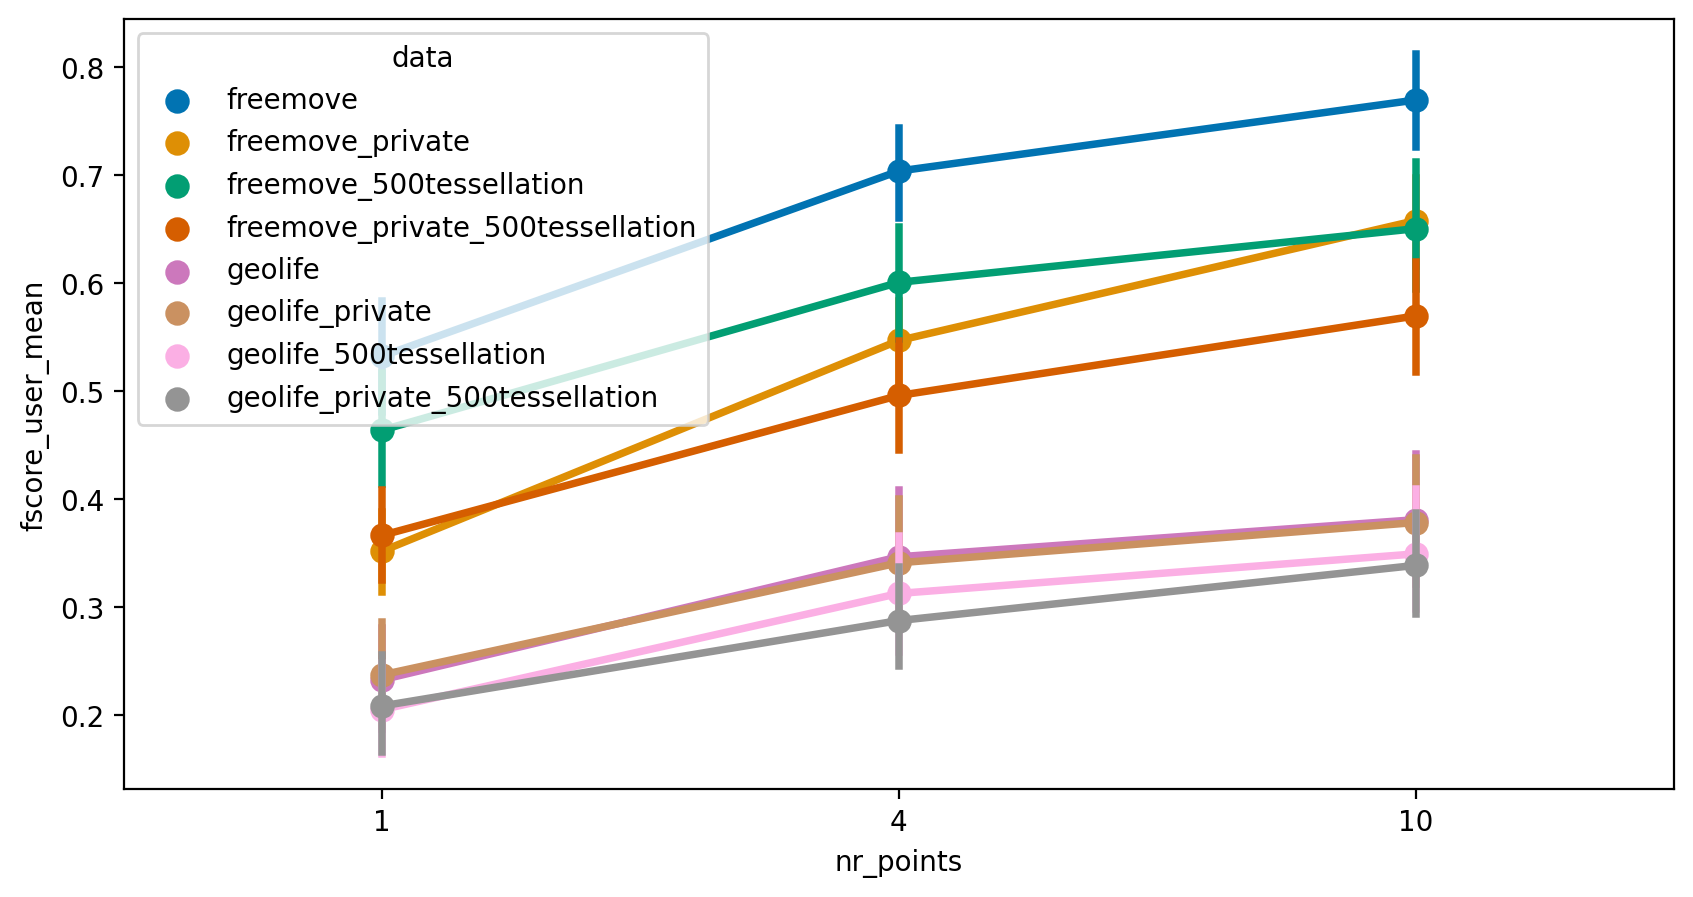

In [404]:
ax1 = sns.pointplot(x="nr_points", y="fscore_user_mean", data=scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates(), hue='data')

In [396]:
scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates()

,data,user_id,nr_points,fscore_user_mean
0,freemove,16348,1,0.642934
100,freemove,16349,1,0.148871
200,freemove,16353,1,0.783371
300,freemove,16354,1,0.450777
400,freemove,16356,1,0.441977
...,...,...,...,...
134100,geolife_private_500tessellation,153,10,0.605215
134200,geolife_private_500tessellation,163,10,0.147658
134300,geolife_private_500tessellation,167,10,0.096292
134400,geolife_private_500tessellation,174,10,0.365955


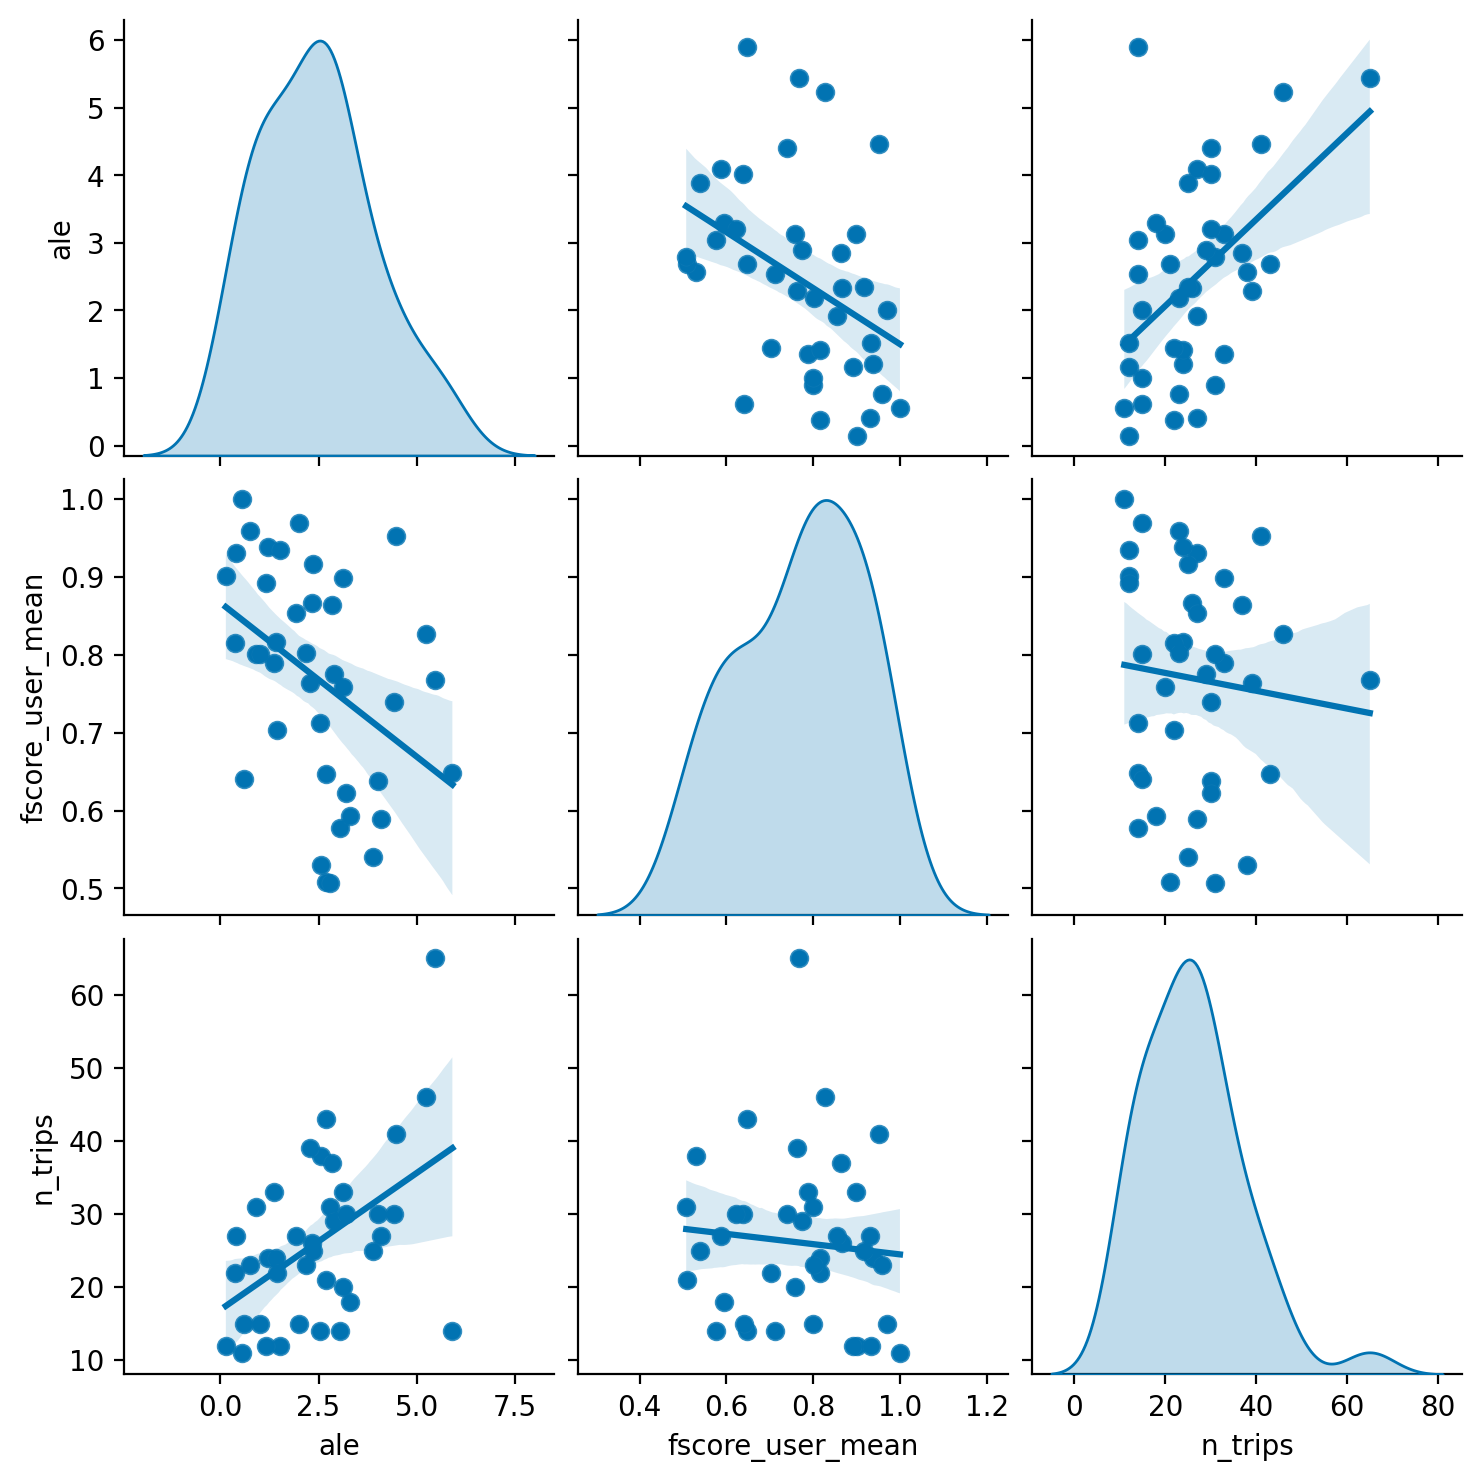

In [407]:
data_pairplot = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 10 and (data == "freemove")')
g = sns.pairplot(data_pairplot[['ale', 'fscore_user_mean', 'n_trips']], diag_kind="kde")
g.map_offdiag(sns.regplot)

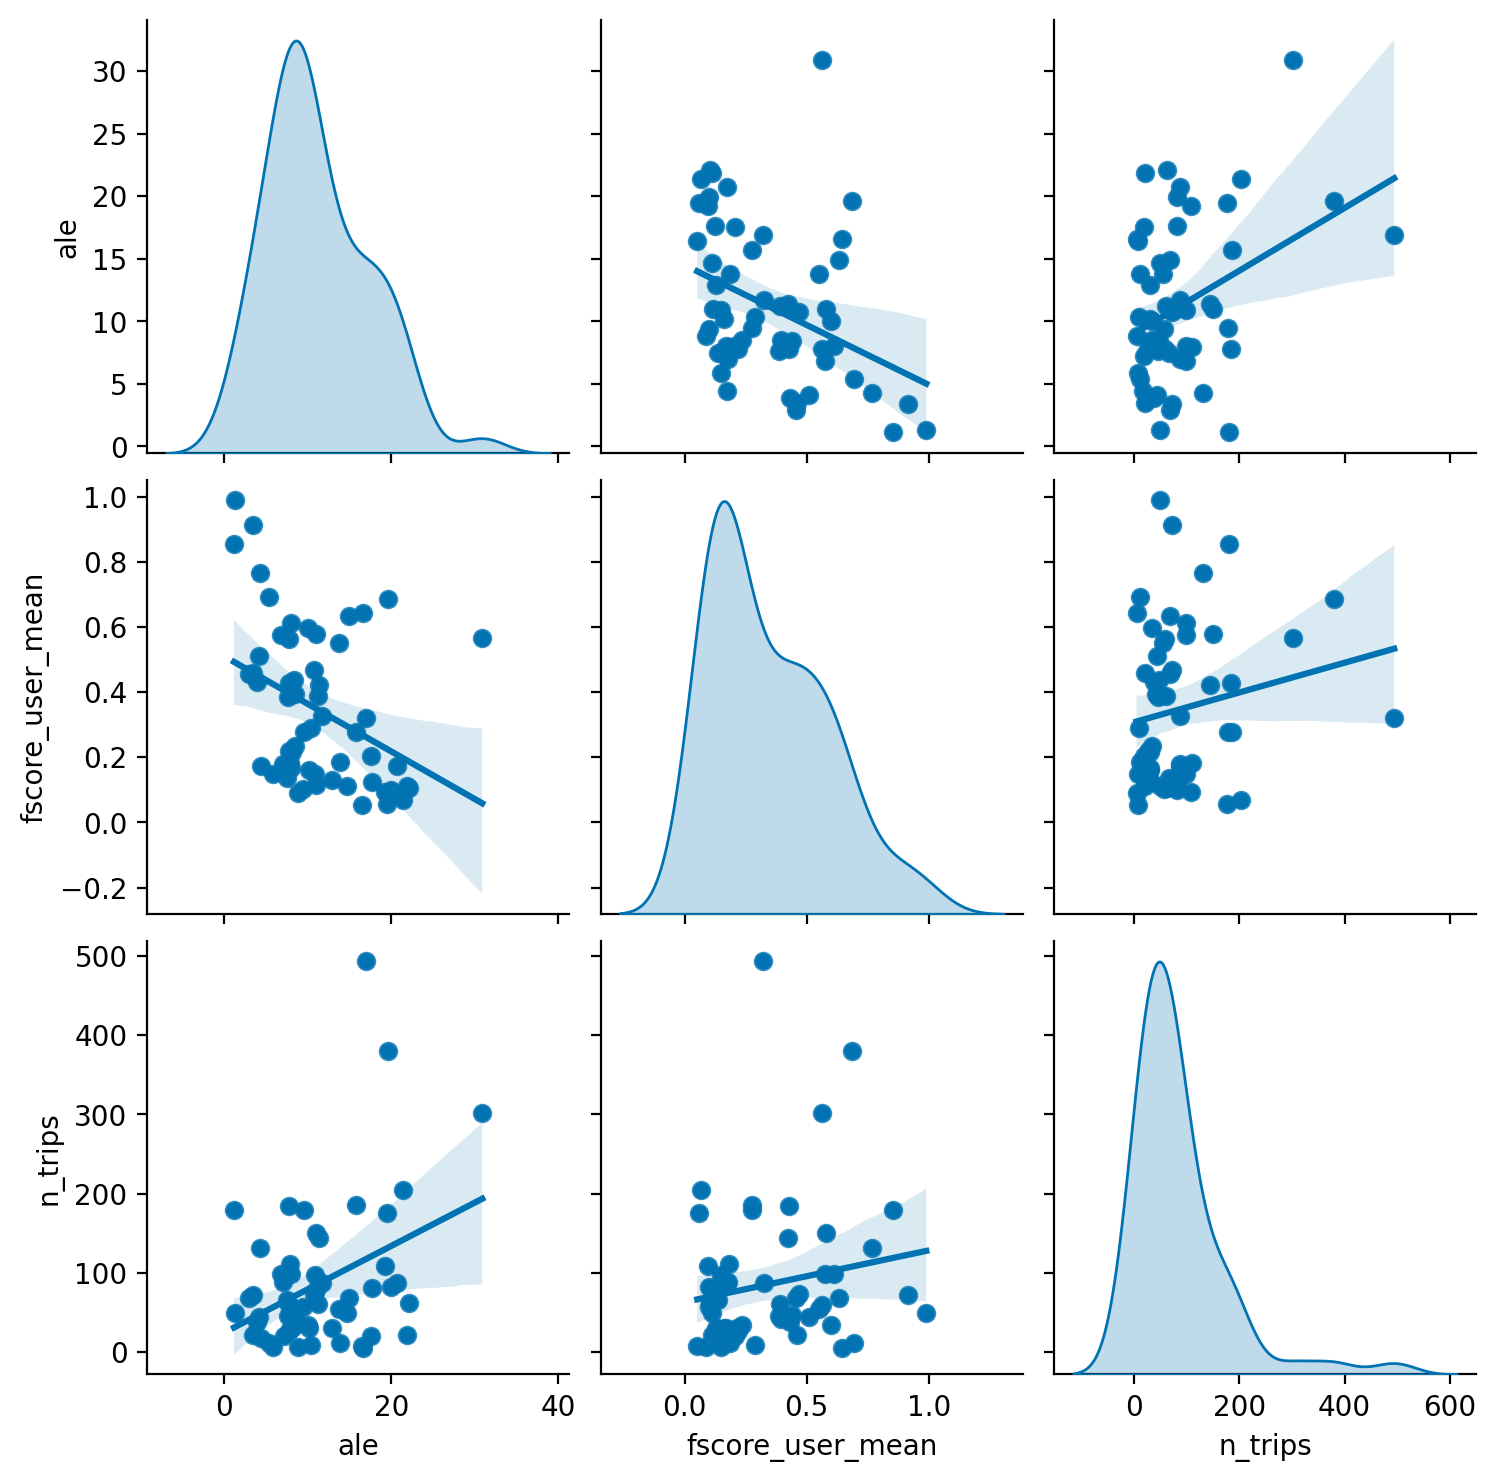

In [408]:
data_pairplot = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 4 and (data == "geolife")')
g = sns.pairplot(data_pairplot[['ale', 'fscore_user_mean', 'n_trips']], diag_kind="kde")
g.map_offdiag(sns.regplot)

[None]

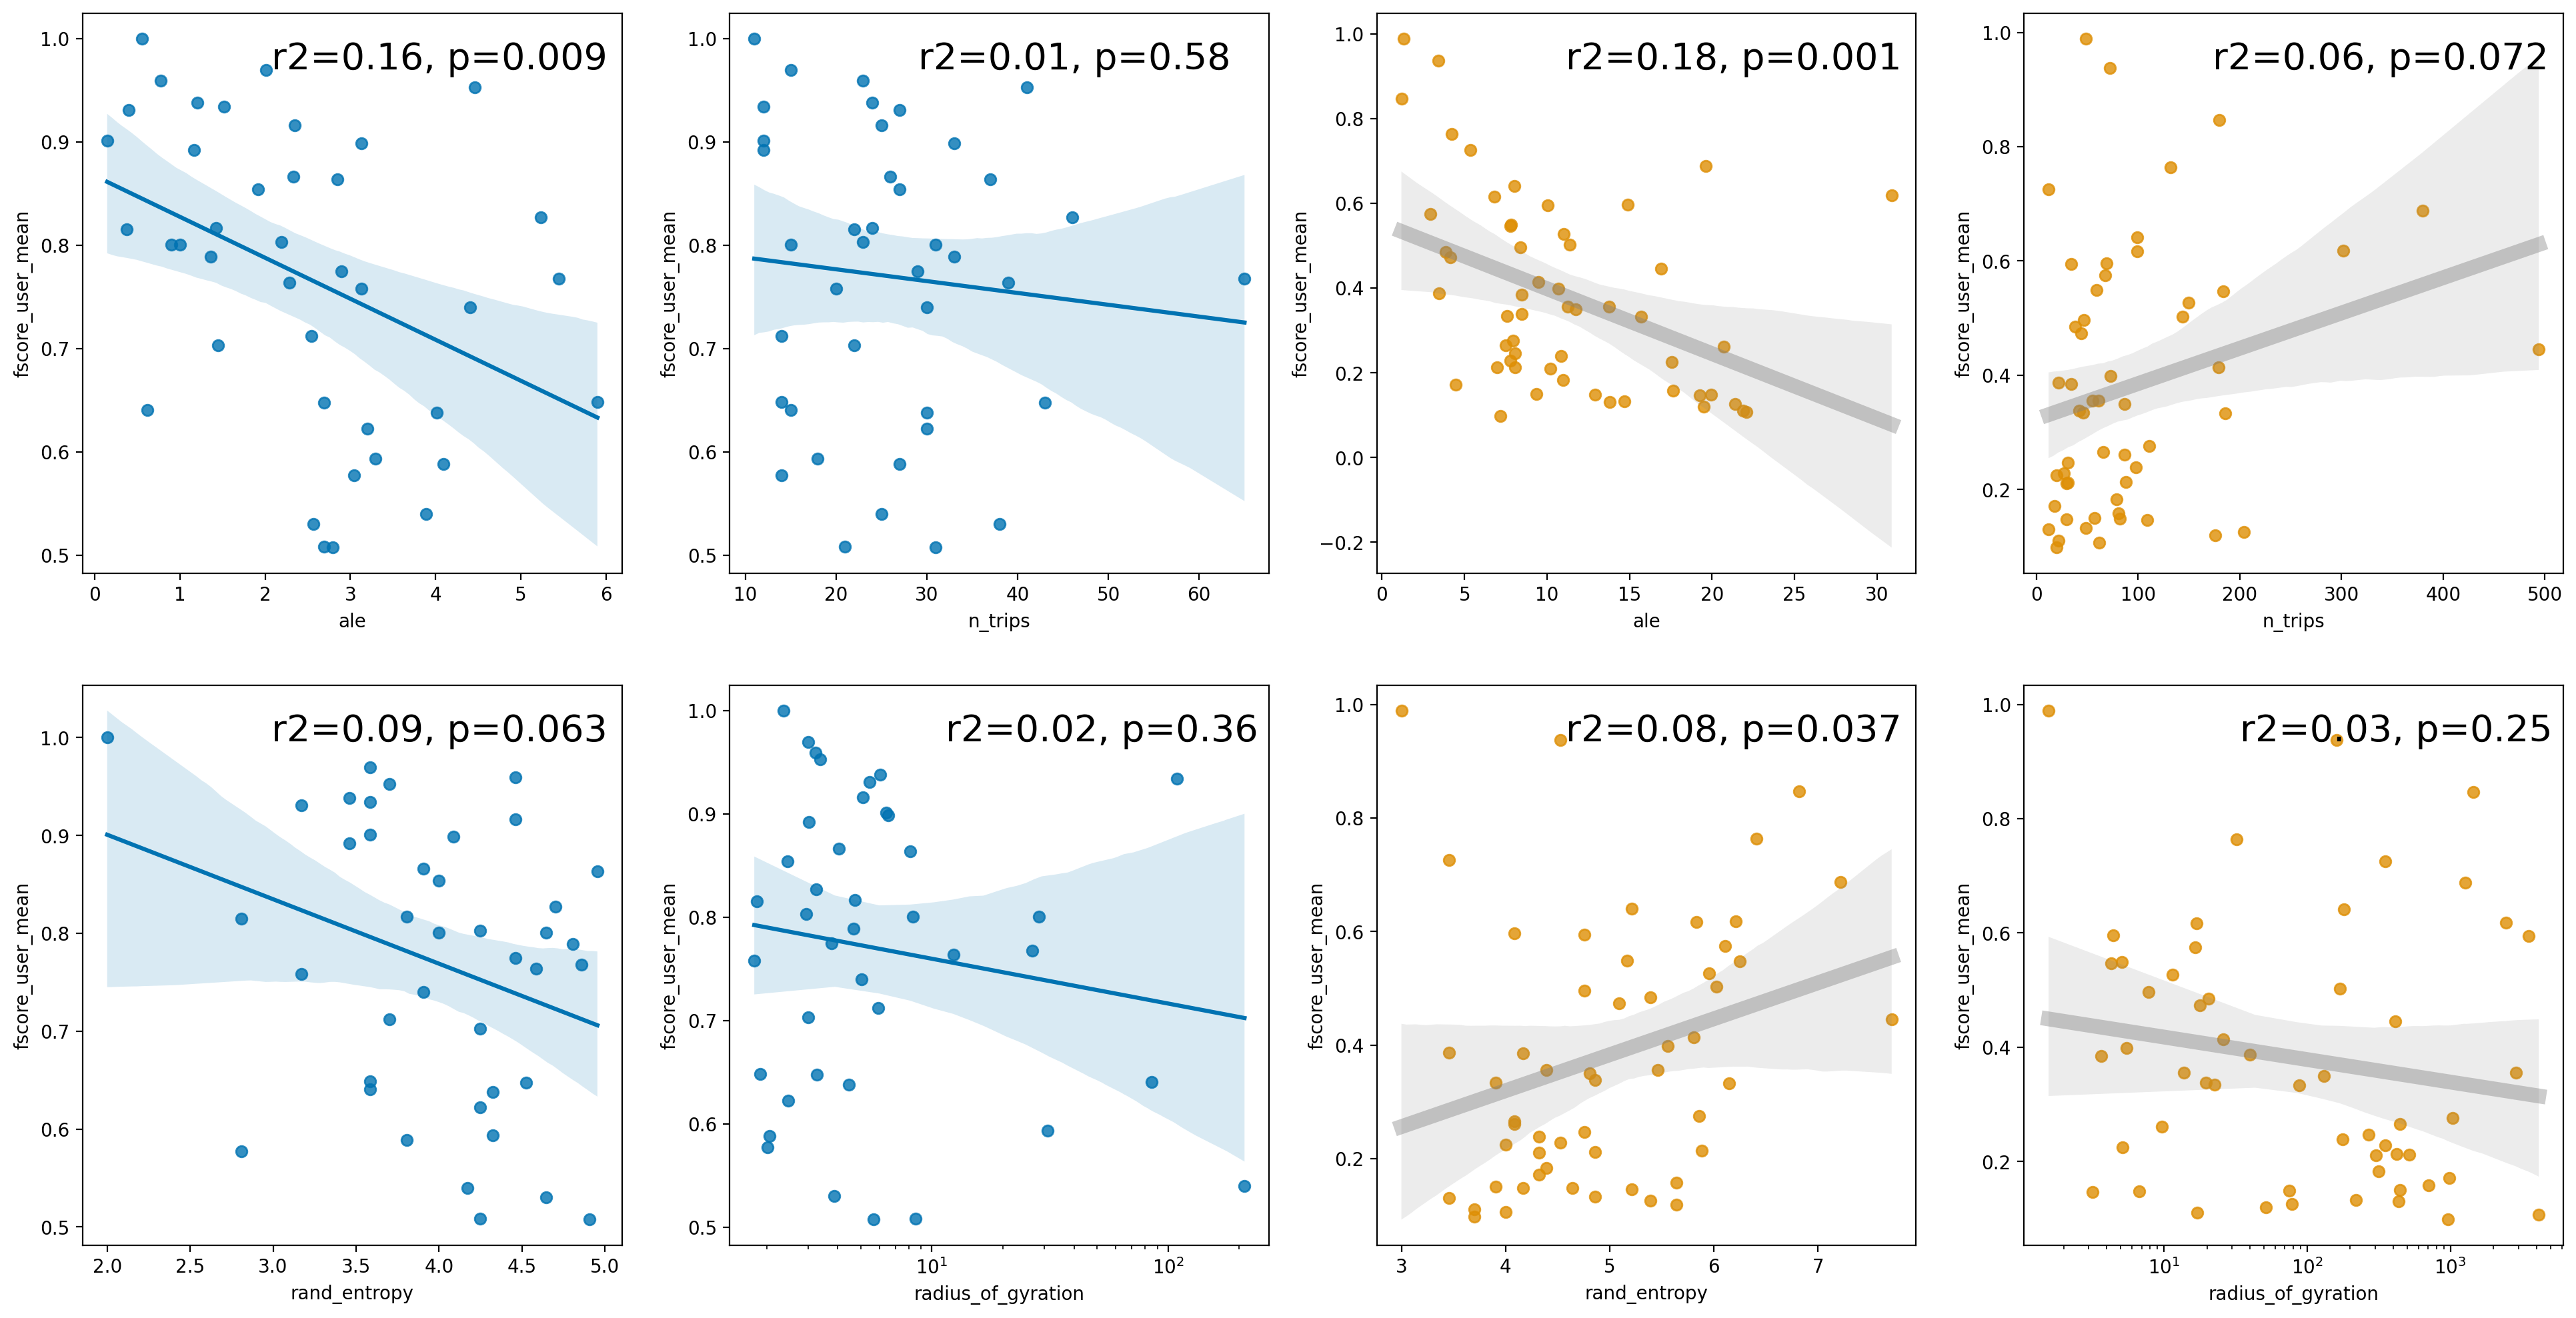

In [443]:
data_pairplot_geolife = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 10 and (data == "geolife")')
data_pairplot_freemove = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 10 and (data == "freemove")')


f, (ax_1, ax_2) = plt.subplots(nrows=2, ncols=4, sharex=False, figsize=(24,12))

import scipy
import numpy as np

def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    ax.text(.35, .9, f'r2={rvalue ** 2:.2f}, p={np.round(pvalue,3):.2g}', transform=ax.transAxes, fontsize=20)

ax = sns.regplot(
            x='ale', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            ax=ax_1[0])
annotate(ax_1[0], data_pairplot_freemove, x='ale', y='fscore_user_mean')

ax = sns.regplot(
            x='n_trips', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            ax=ax_1[1])
annotate(ax_1[1], data_pairplot_freemove, x='n_trips', y='fscore_user_mean')

ax = sns.regplot(
            x='rand_entropy', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            ax=ax_2[0])
annotate(ax_2[0], data_pairplot_freemove, x='rand_entropy', y='fscore_user_mean')

#Slope is the change in Y when the log(X) changes by 1.0 (so X changes by a factor of 10)
ax = sns.regplot(
            x='radius_of_gyration', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            ax=ax_2[1],
            logx=True)

slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=np.log(data_pairplot_freemove['radius_of_gyration']), y=data_pairplot_freemove['fscore_user_mean'])
ax_2[1].text(.4, .9, f'r2={rvalue ** 2:.2f}, p={pvalue:.2g}', transform=ax.transAxes, fontsize=20)
ax_2[1].set(xscale="log")




ax = sns.regplot(
            x='ale', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.4, 'color':'grey'},
            ax=ax_1[2])
annotate(ax_1[2], data_pairplot_geolife, x='ale', y='fscore_user_mean')

ax = sns.regplot(
            x='n_trips', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.4, 'color':'grey'},
            ax=ax_1[3])
annotate(ax_1[3], data_pairplot_geolife, x='n_trips', y='fscore_user_mean')

ax = sns.regplot(
            x='rand_entropy', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.4, 'color':'grey'},
            ax=ax_2[2])
annotate(ax_2[2], data_pairplot_geolife, x='rand_entropy', y='fscore_user_mean')

#Slope is the change in Y when the log(X) changes by 1.0 (so X changes by a factor of 10)
ax = sns.regplot(
            x='radius_of_gyration', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            ax=ax_2[3],
            logx=True,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.4, 'color':'grey'})

slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=np.log(data_pairplot_geolife['radius_of_gyration']), y=data_pairplot_geolife['fscore_user_mean'])
ax_2[3].text(.4, .9, f'r2={rvalue ** 2:.2f}, p={pvalue:.2g}', transform=ax.transAxes, fontsize=20)
ax_2[3].set(xscale="log")

In [363]:
data_hour_of_day

,data,user_id,precision,recall,pr_mean,f_score,nr_points,rand_entropy,ale,n_trips,hour_of_day,uid,radius_of_gyration,fscore_user_mean
495800,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16348.0,4.043032,0.830248
495801,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16349.0,3.867014,0.830248
495802,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16353.0,2.449512,0.830248
495803,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16354.0,1.871242,0.830248
495804,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16356.0,5.025835,0.830248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895395,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17267.0,8.766260,0.765082
895396,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17268.0,2.362354,0.765082
895397,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17269.0,5.920504,0.765082
895398,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17272.0,0.012543,0.765082


<Axes: xlabel='hour_of_day', ylabel='Density'>

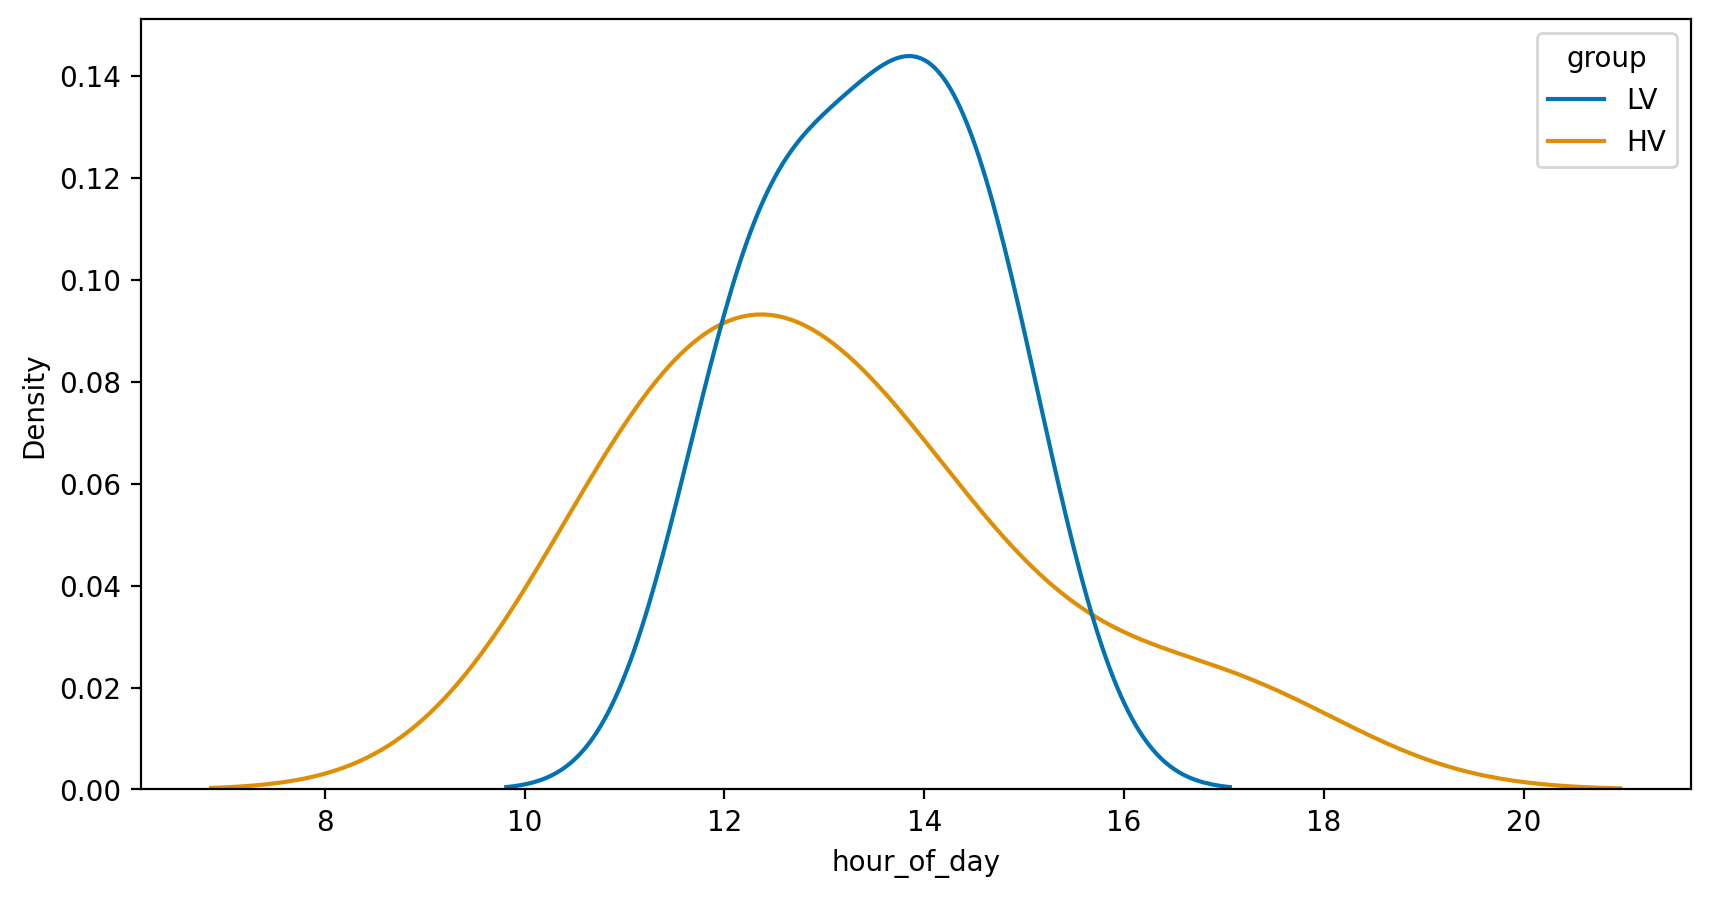

In [373]:
data_hour_of_day = scores.groupby(['user_id', 'data', 'nr_points']).mean().query('data == "freemove" and nr_points==10').copy()
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean >= data_hour_of_day.fscore_user_mean.quantile(0.8), 'group'] = "HV"
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean <= data_hour_of_day.fscore_user_mean.quantile(0.2),'group'] = "LV"


sns.kdeplot(data=data_hour_of_day, x="hour_of_day", hue="group")


<Axes: xlabel='hour_of_day', ylabel='Density'>

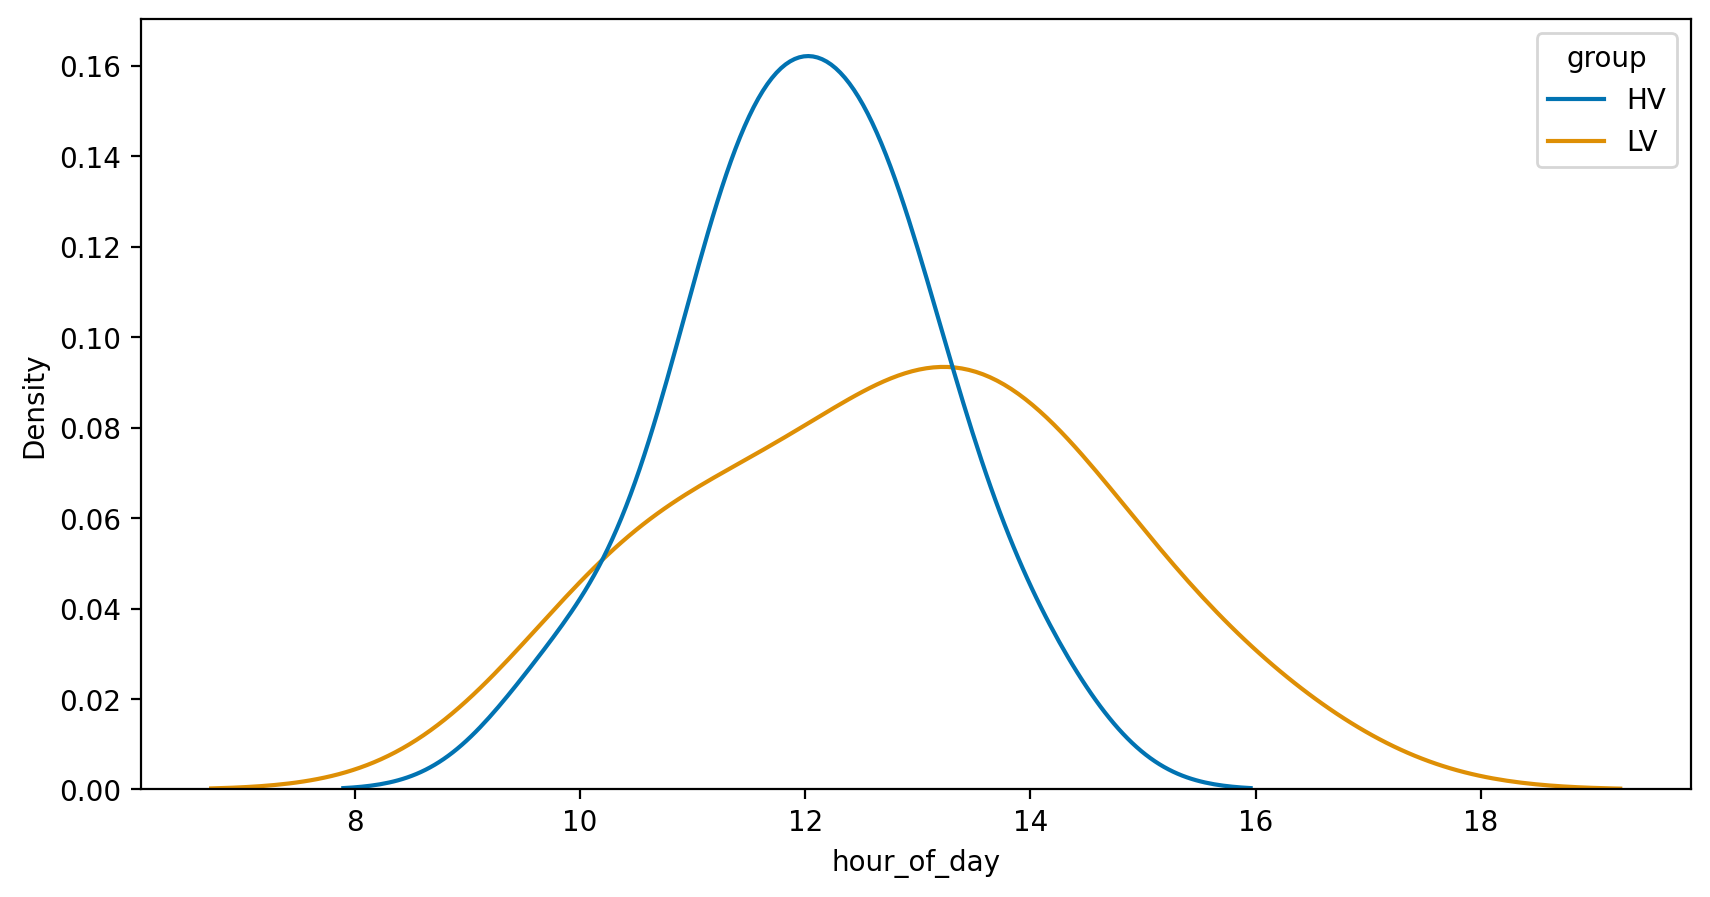

In [372]:
data_hour_of_day = scores.groupby(['user_id', 'data', 'nr_points']).mean().query('data == "geolife" and nr_points==10').copy()
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean >= data_hour_of_day.fscore_user_mean.quantile(0.8), 'group'] = "HV"
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean <= data_hour_of_day.fscore_user_mean.quantile(0.2),'group'] = "LV"


sns.kdeplot(data=data_hour_of_day, x="hour_of_day", hue="group")
